In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the working directory
import os
os.chdir("/Users/alexanderschou/Desktop/Projects/adv_mla_2024/AT2_experimentation/data/processed")

# Load the data
sales_train_processed = pd.read_csv('sales_train_processed.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(sales_train_processed.head())

# Summary of the dataset
print("\nDataset Info:")
sales_train_processed.info()

print("\nSummary Statistics:")
display(sales_train_processed.describe())

# Check for missing values
print("\nMissing Values per Column:")
missing_values = sales_train_processed.isnull().sum()
display(missing_values[missing_values > 0])

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_columns = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'event_name', 'event_type']
for col in categorical_columns:
    print(f"{col}: {sales_train_processed[col].nunique()} unique values")

# Visualizing distribution of sales
plt.figure(figsize=(10,6))
sns.histplot(sales_train_processed['sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Sales by state
plt.figure(figsize=(10,6))
sns.boxplot(x='state_id', y='sales', data=sales_train_processed)
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

# Sales over time
sales_train_processed['date'] = pd.to_datetime(sales_train_processed['date'])
sales_by_date = sales_train_processed.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(sales_by_date['date'], sales_by_date['sales'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Sales by category
plt.figure(figsize=(10,6))
sns.boxplot(x='cat_id', y='sales', data=sales_train_processed)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Correlation heatmap
#plt.figure(figsize=(10,6))
#corr_matrix = sales_train_processed.corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()


In [ ]:
plt.figure(figsize=(10,6))
corr_matrix = sales_train_processed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
sales_by_date = sales_train_processed.groupby(['date', 'item_id', 'store_id', 'state_id'])['sales'].sum().reset_index()
plt.show()

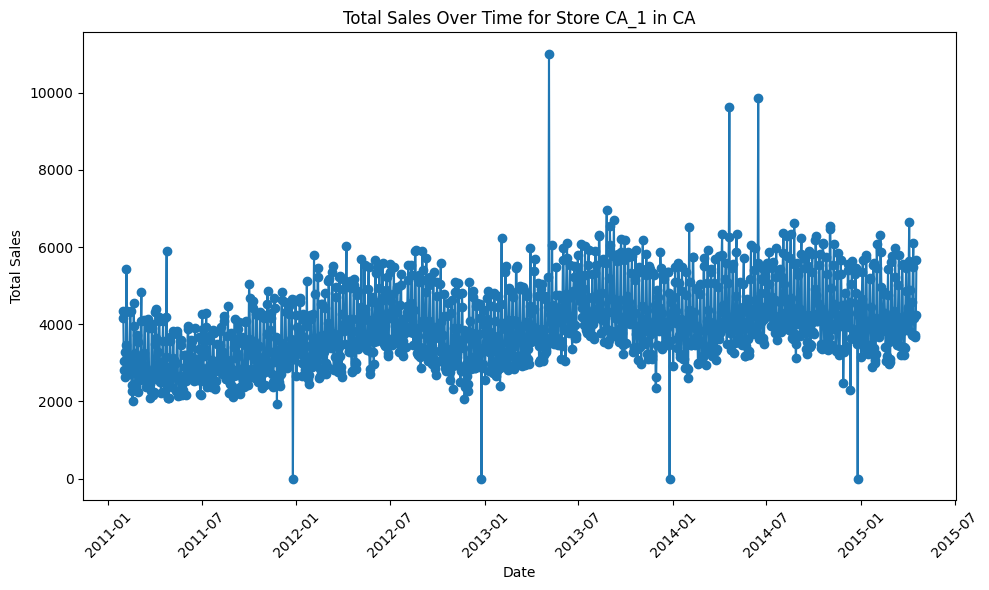

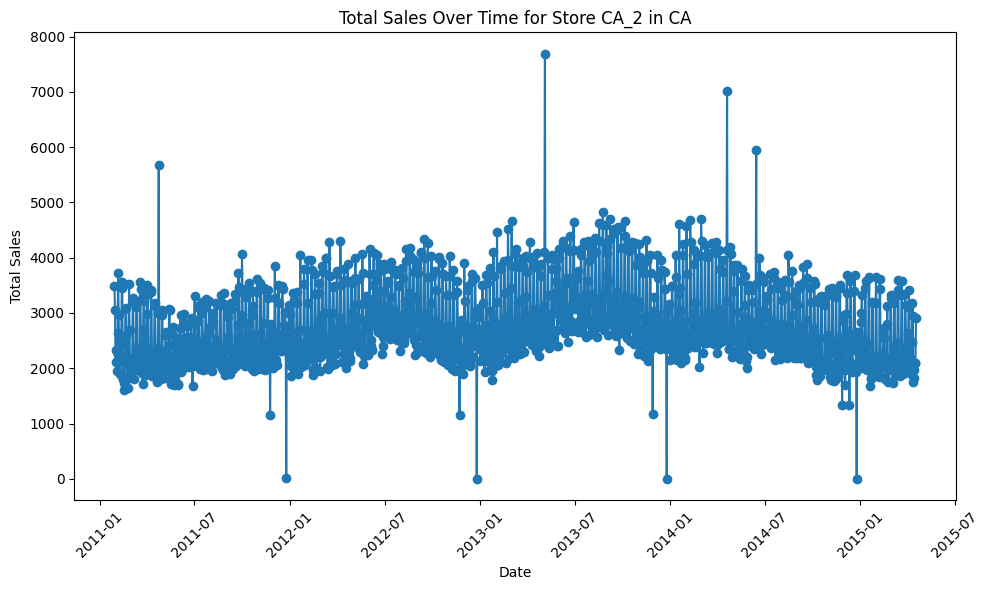

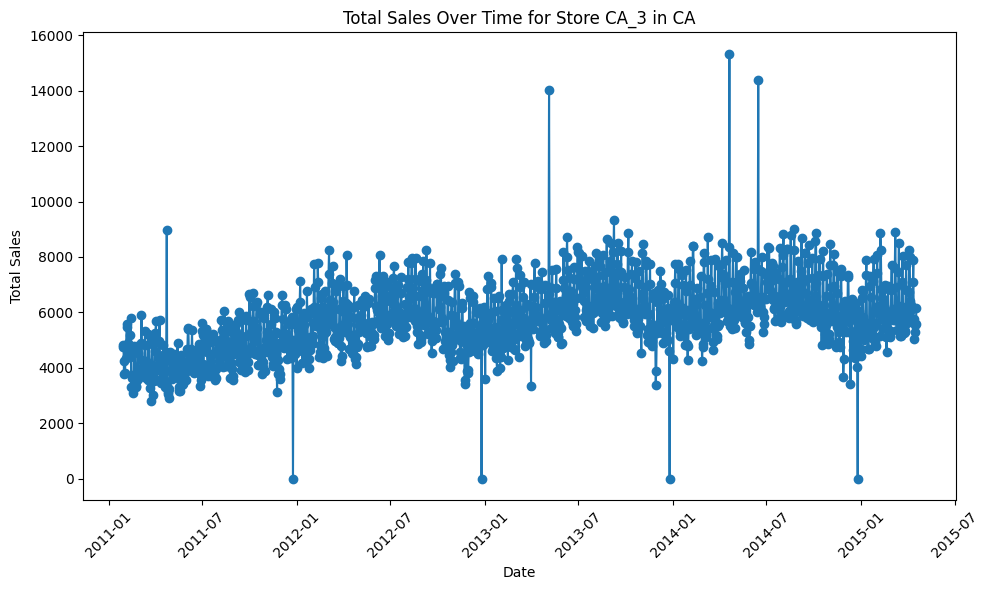

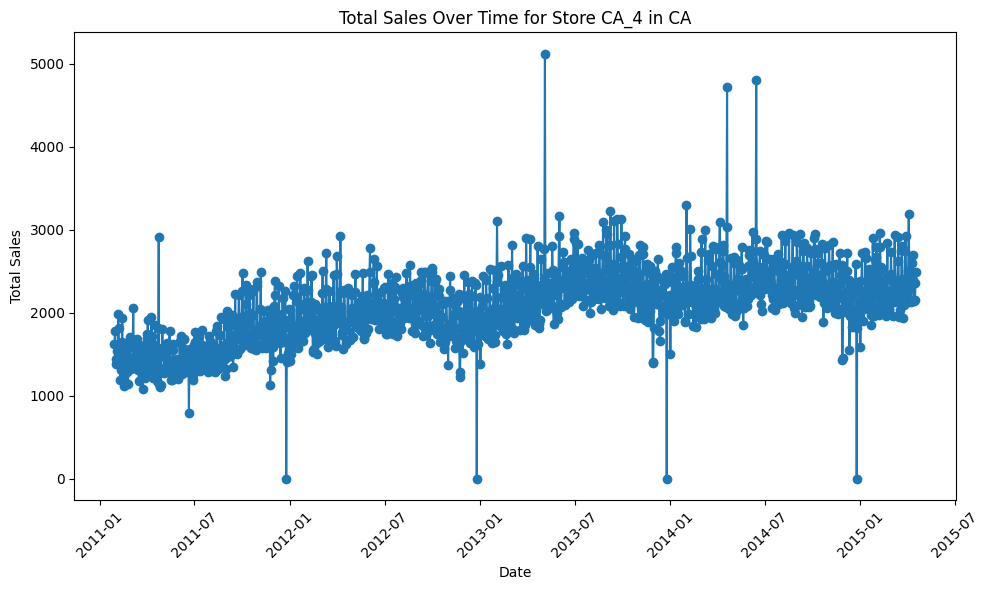

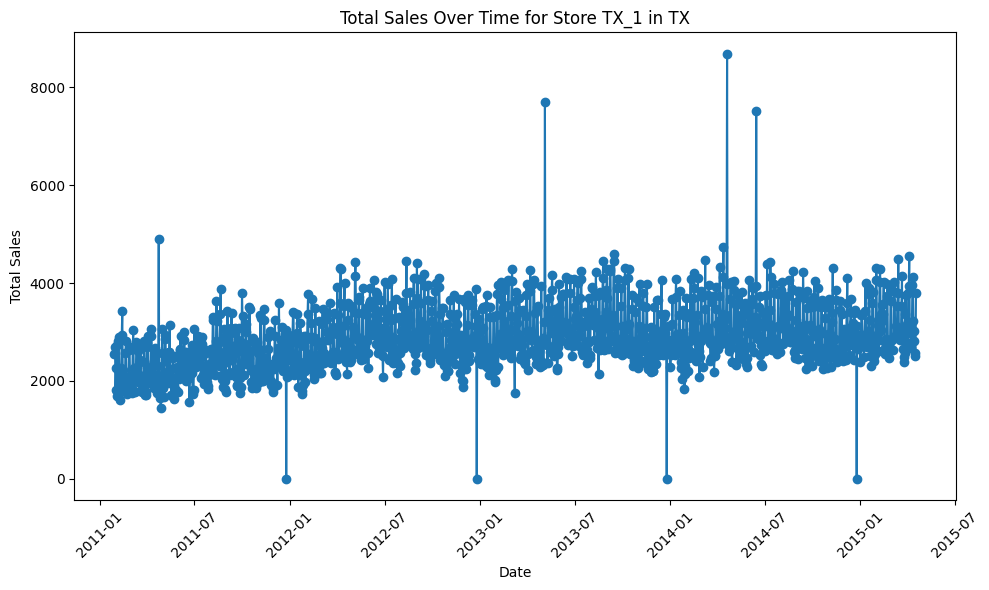

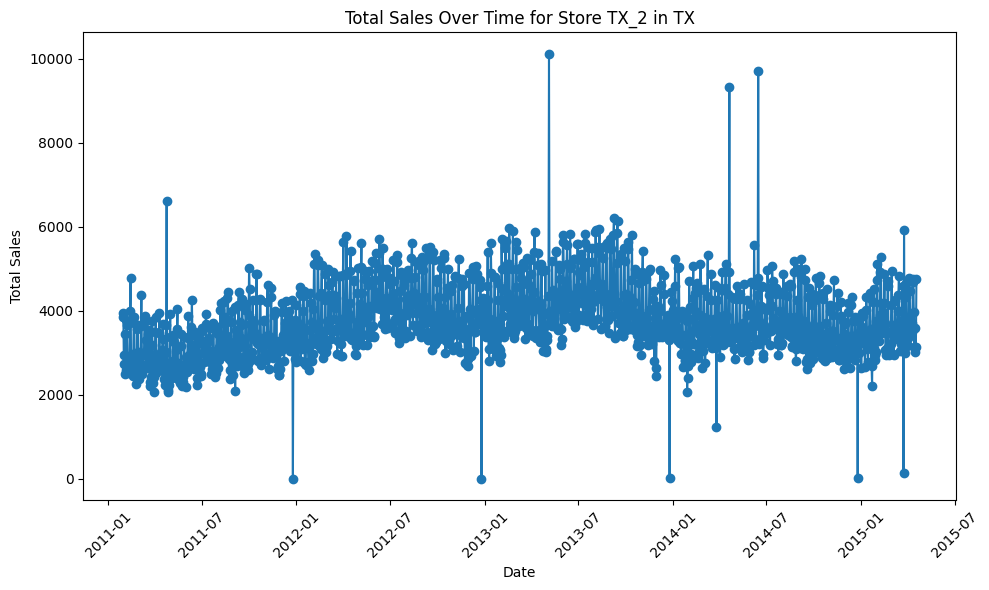

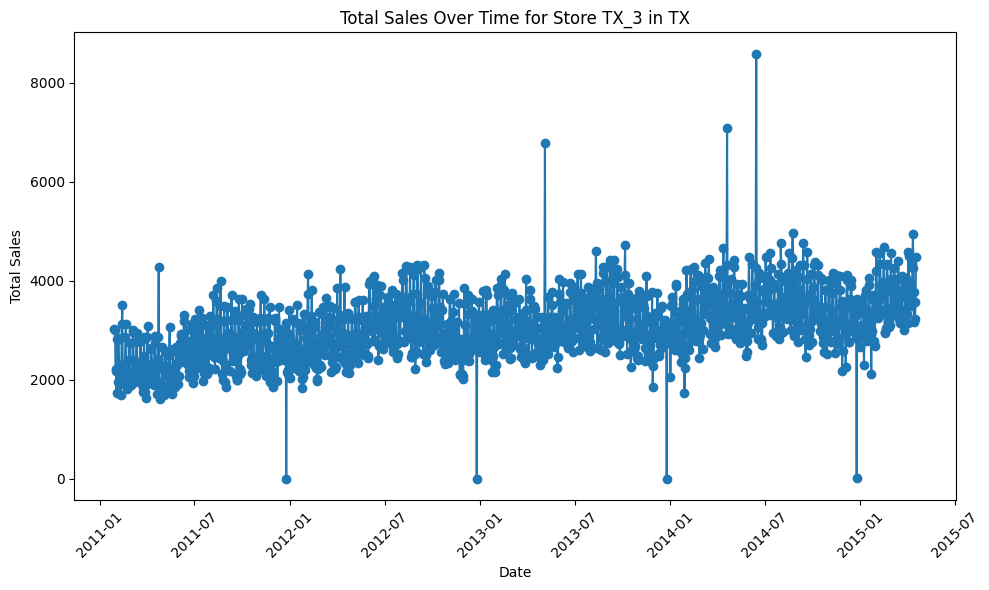

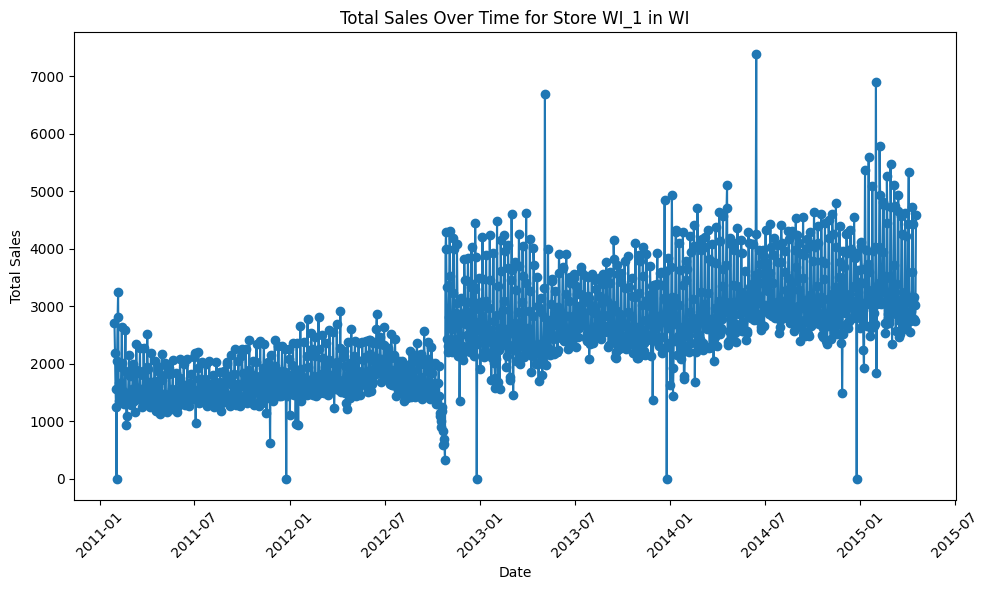

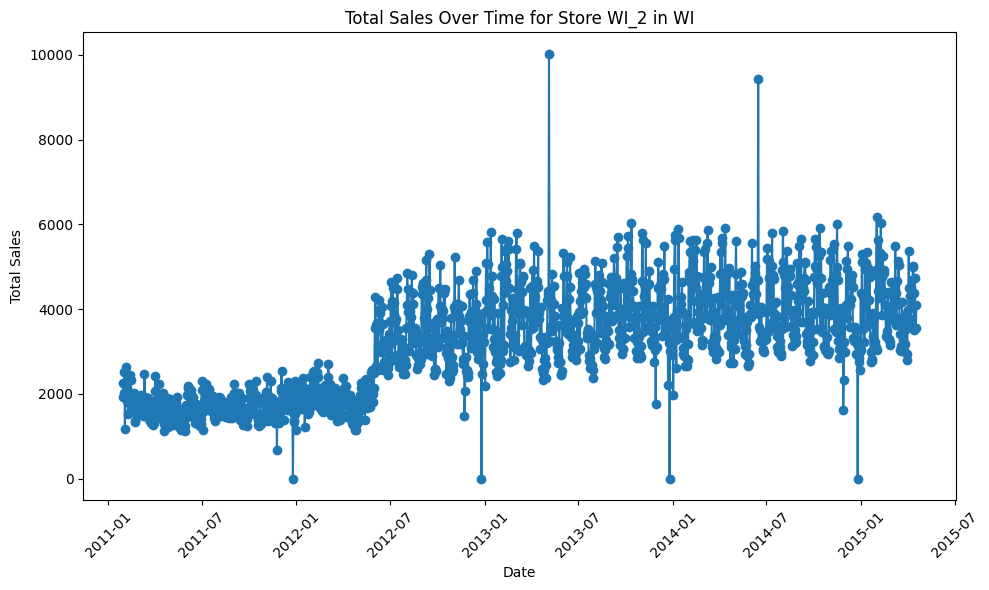

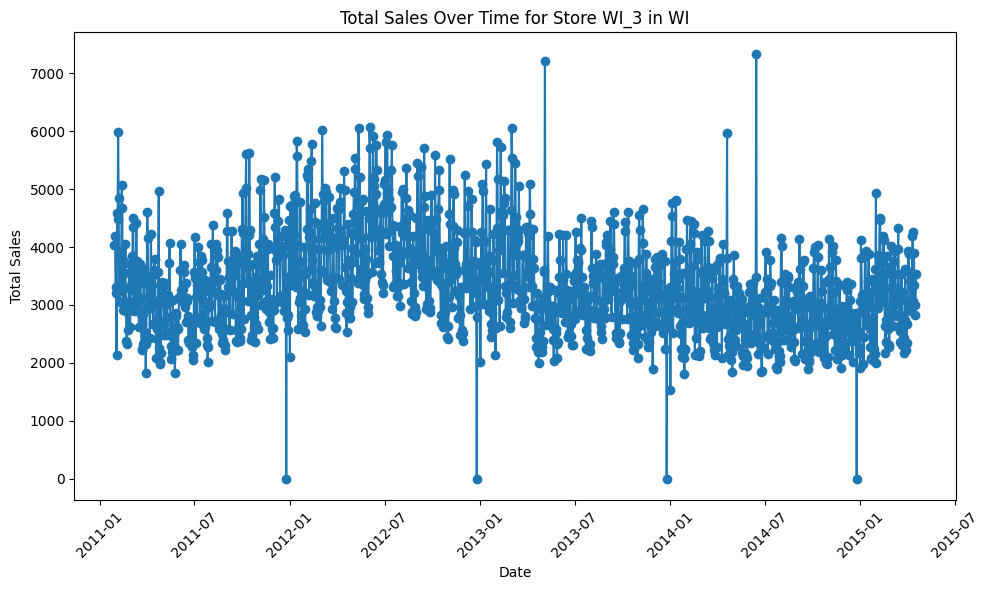

In [16]:
sales_by_date = sales_train_processed.groupby(['date', 'store_id', 'state_id'])['sales'].sum().reset_index()

# Get unique store and state combinations
store_state_combinations = sales_by_date[['store_id', 'state_id']].drop_duplicates()

# Loop through each store and state combination to create individual plots
for index, row in store_state_combinations.iterrows():
    store_id = row['store_id']
    state_id = row['state_id']
    
    # Filter data for the current store and state
    store_data = sales_by_date[(sales_by_date['store_id'] == store_id) & (sales_by_date['state_id'] == state_id)]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(store_data['date'], store_data['sales'], marker='o')
    plt.title(f'Total Sales Over Time for Store {store_id} in {state_id}')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

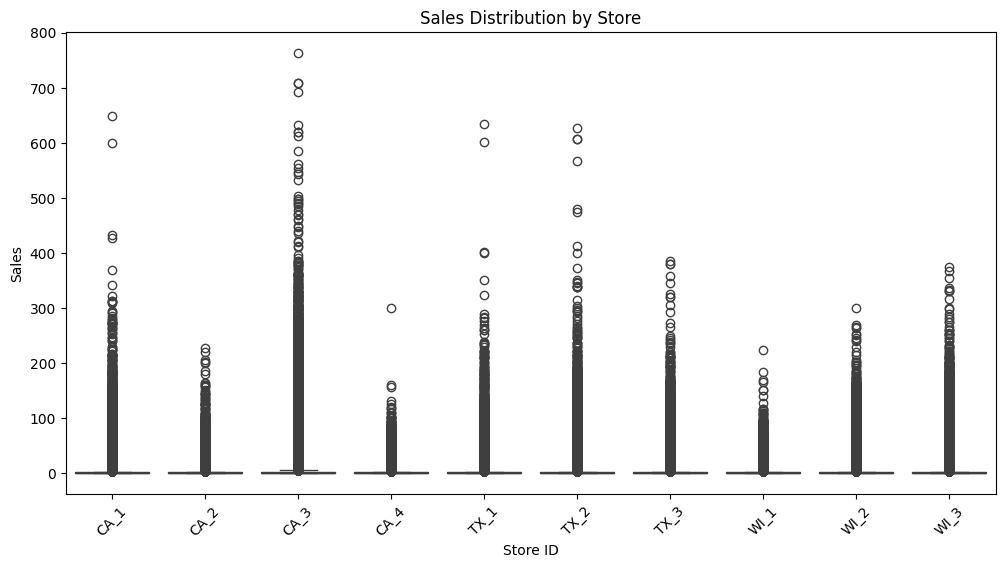

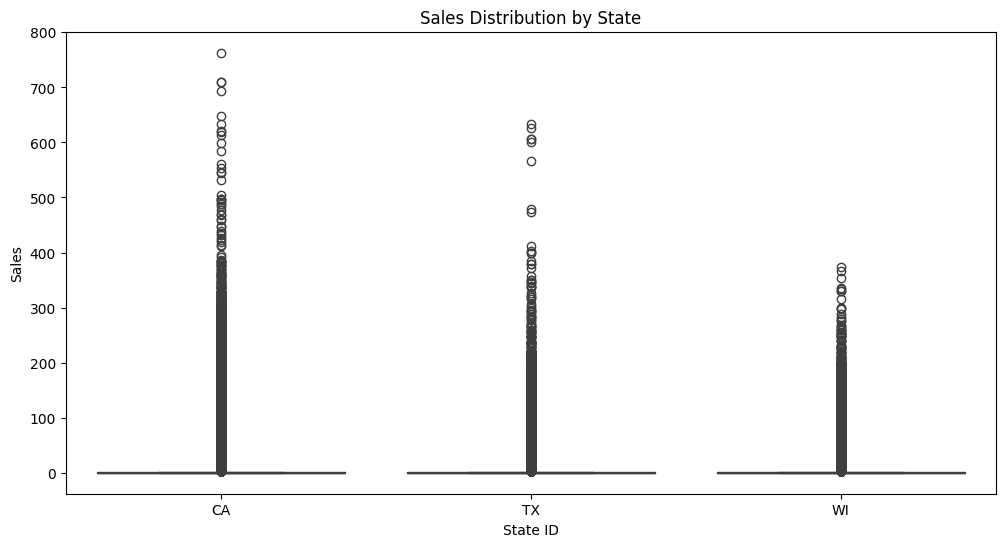

In [17]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for sales by store
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='sales', data=sales_train_processed)
plt.title('Sales Distribution by Store')
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Create a box plot for sales by state
plt.figure(figsize=(12, 6))
sns.boxplot(x='state_id', y='sales', data=sales_train_processed)
plt.title('Sales Distribution by State')
plt.xlabel('State ID')
plt.ylabel('Sales')
plt.show()


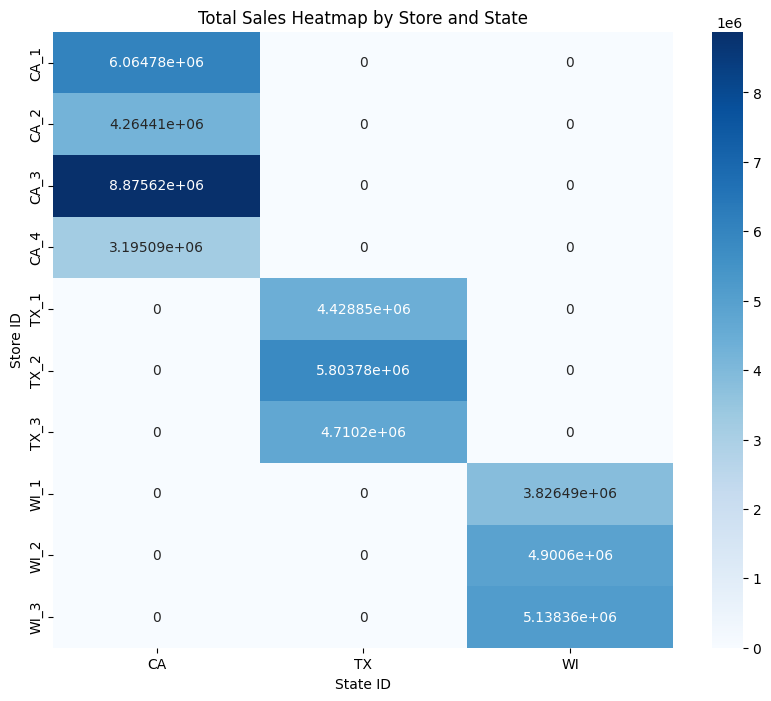

In [18]:
sales_pivot = sales_train_processed.pivot_table(values='sales', index='store_id', columns='state_id', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(sales_pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Total Sales Heatmap by Store and State')
plt.xlabel('State ID')
plt.ylabel('Store ID')
plt.show()

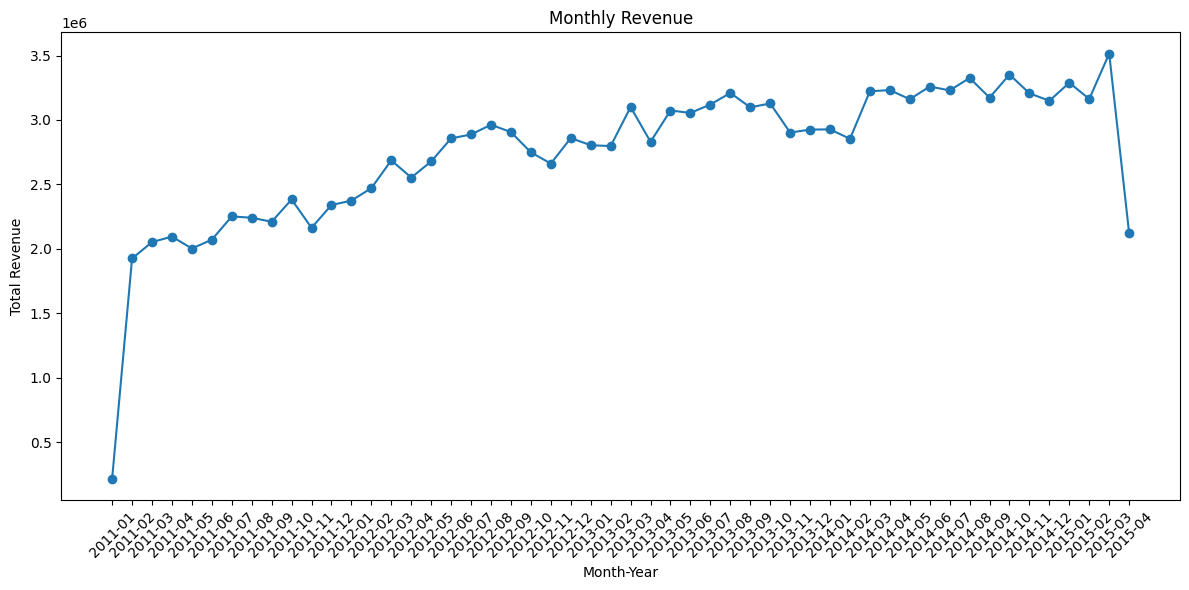

In [19]:
sales_train_processed['date'] = pd.to_datetime(sales_train_processed['date'])

# Create a new column for month and year
sales_train_processed['year_month'] = sales_train_processed['date'].dt.to_period('M')

# Group by month and calculate total revenue
monthly_revenue = sales_train_processed.groupby('year_month')['revenue'].sum().reset_index()

# Convert 'year_month' back to a string for plotting
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

# Plotting the monthly revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['year_month'], monthly_revenue['revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

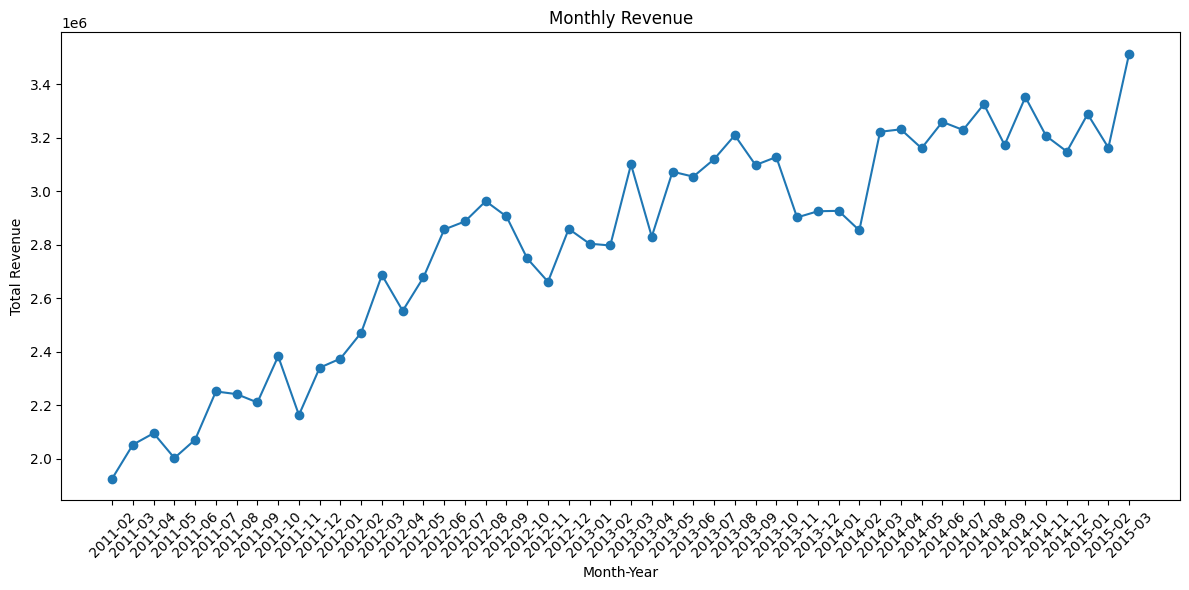

In [21]:
monthly_revenue_filtered = monthly_revenue.iloc[1:-1]

# Plotting the filtered monthly revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue_filtered['year_month'], monthly_revenue_filtered['revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()